# DÍAZ TAPIA ERICK ULISES

# CLASIFICACIÓN CON SVM Y NN

En la presente actividad se va a emplear un dataset que contiene información de características de celulares para clasificarlos en un rango de precios.

La información del *dataset* es:
* *battery_power*: Energía total que una batería puede almacenar en un tiempo medido en *mAh*
* *blue*: Indica si tiene *bluetooth* o no
* *clock_speed*: Velocidad del microprocesador
* *dual_sim*: Indica si tiene soporte dual de *sim* o no
* *fc*: Megapíxeles de la cámara frontal
* *four_g*: Indica si tiene 4G o no
* *int_memory*: Memoria interna en GB
* *m_dep*: Grosor del celular en cm
* *mobile_wt*: Peso del celular
* *n_cores*: Número de núcleos del procesador
* *pc*: Megapíxeles de la cámara principal
* *px_height*: Alto de la resolución de píxeles
* *px_width*: Ancho de resolución de píxeles
* *ram*: RAM en MB
* *sc_h*: Alto de la pantalla en cm
* *sc_w*: Ancho de la pantalla en cm
* *talk_time*: tiempo máximo que durará una sola carga de la batería
* *tres_g*: Indica si es 3G o no
* *touch_screen*: Indica si tiene pantalla táctil o no
* *wifi*: Indica si tiene wifi o no
* ***price_range***: Es la variable objetivo con valor 0 (bajo costo), 1 (costo medio), 2 (costo alto) y 3 (costo muy alto).

### IMPORTACIÓN DE LIBRERIAS A UTILIZAR

In [ ]:
import time

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

### CARGA DEL DATASET

In [ ]:
data = pd.read_csv('train.csv')
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Tamaño del dataset
data.shape

(2000, 21)

In [ ]:
#Información de las variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# 1. ANÁLISIS DESCRIPTIVO DE DATOS


## Variables numéricas

In [ ]:
#Resumen estadístico de las variables
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Dado que los teléfonos celulares poseen dimensiones físicas inherentes, como el tamaño de pantalla y la resolución en píxeles, es posible inferir que existen irregularidades en las variables categóricas 'px_height' y 'sc_w', las cuales representan la resolución en píxeles y la altura de la pantalla, respectivamente. En consecuencia, no deberían existir valores iguales a cero en estas variables, como se puede observar en la descripción del conjunto de datos.

Por lo tanto, se procederá a corregir los datos con valor cero reemplazándolos por la media de la respectiva variable.

In [ ]:
for column in ['px_height', 'sc_w']:
    mean_value = data[column].replace(0, pd.NA).mean()
    data[column] = data[column].replace(0, mean_value)

In [ ]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.753754,1251.515500,2124.213000,12.306500,6.337363,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.310973,432.199447,1084.732044,4.213245,3.960716,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,1.000000,500.000000,256.000000,5.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,284.000000,874.750000,1207.500000,9.000000,3.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,568.000000,1247.000000,2146.500000,12.000000,6.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### **1.1. Escriba el código que permita crear la matriz de correlación de todas las variables numéricas:**

In [ ]:
corr = data.corr()

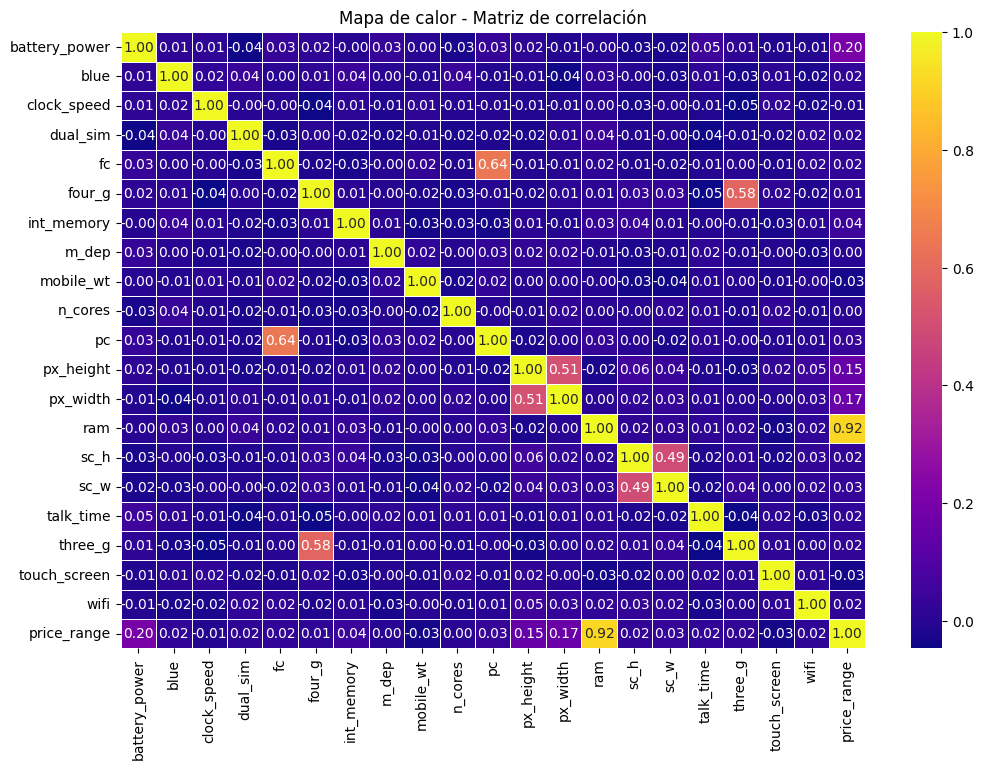

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='plasma', fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor - Matriz de correlación")
plt.show()

## Variables catégoricas

### **1.2. Escriba el código para su análisis y la creación de gráficos de frecuencia:**


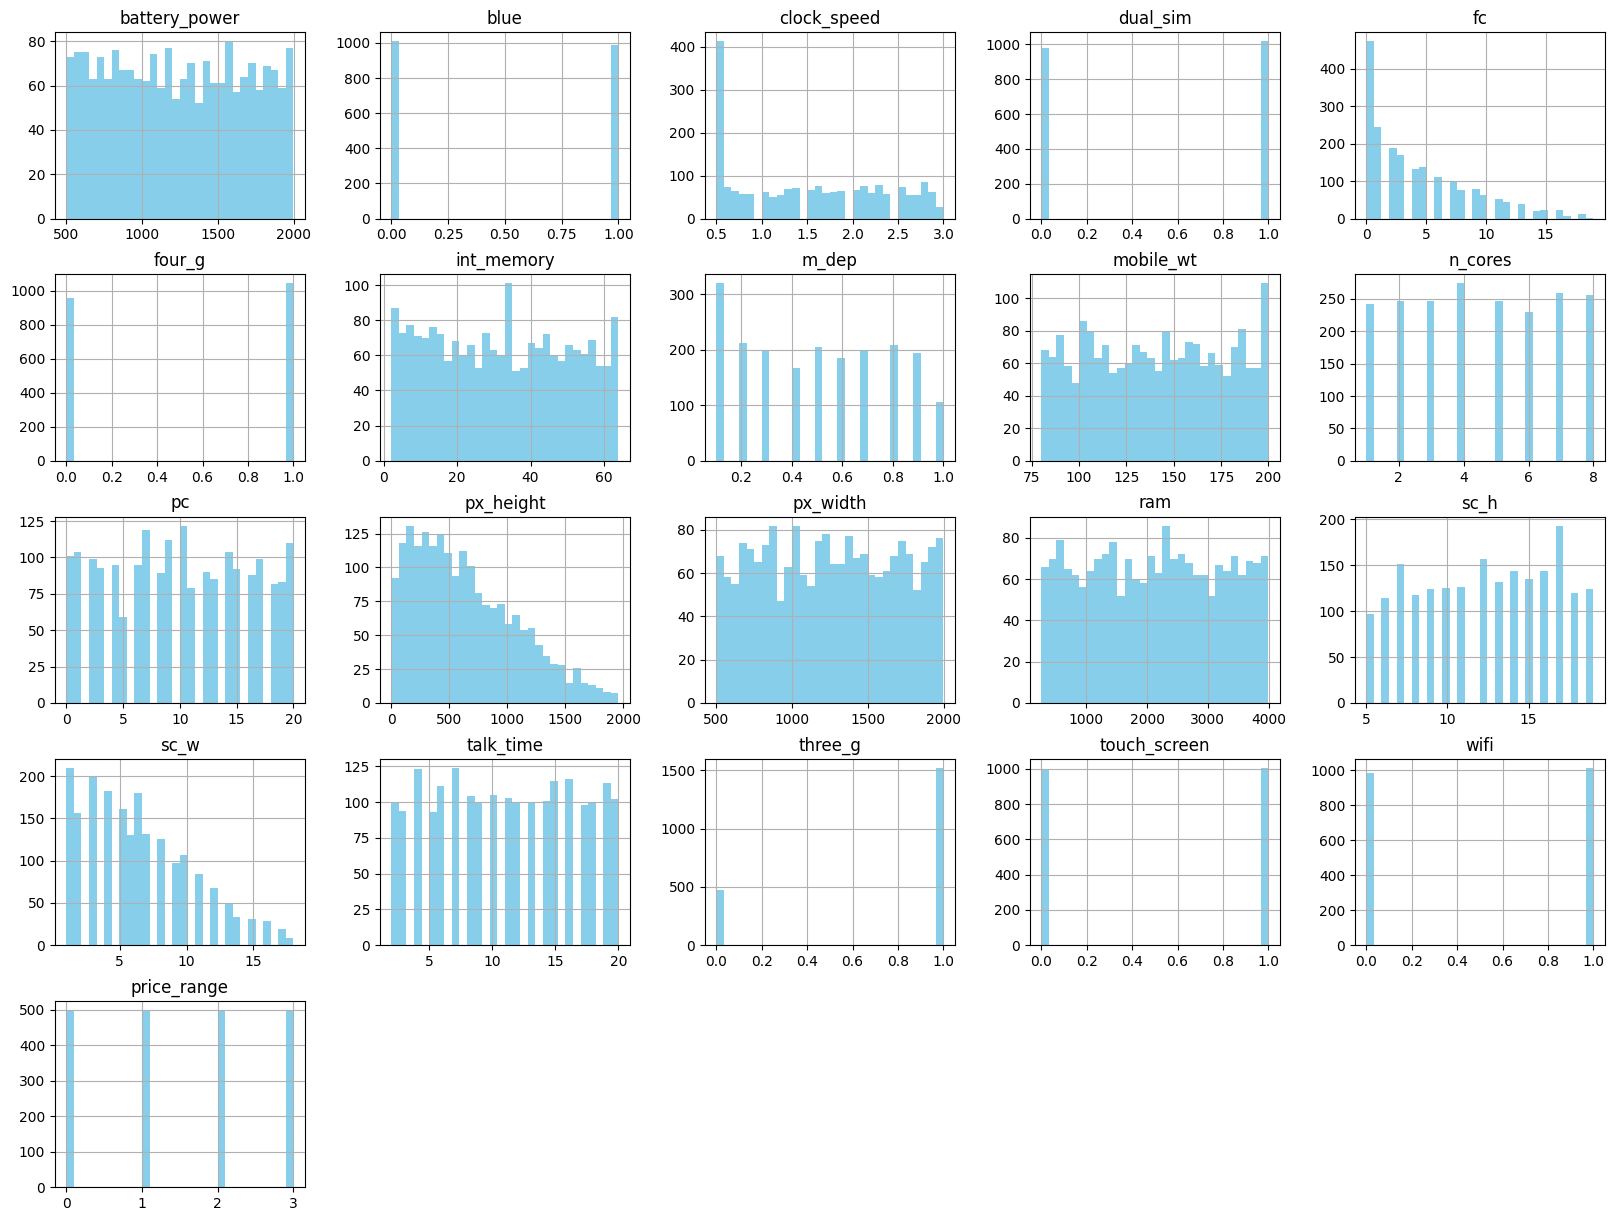

In [ ]:
data.hist(figsize=(20, 15), bins=30, color='skyblue')  # Ajusta los valores según lo necesites
plt.show()

### **1.3. Escriba el código que permita validar si el dataset está balanceado**

In [ ]:
if (data['price_range'].value_counts() > 650).any():
  print('El dataset esta desbalanceado')
else:
  print('El dataset esta balanceado')
  print(data['price_range'].value_counts())

El dataset esta balanceado
price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64


## PREPROCESAMIENTO DE DATOS

In [ ]:
#Crear una copia del dataset para modificaciones
data2 = data.copy()

In [ ]:
#Verificar tamaño
data2.shape

(2000, 21)

La división del dataset debe realizarse antes de escalar los datos para evitar data leakage. Si normalizamos antes de dividir, la información del conjunto de prueba influye en el entrenamiento, lo que genera resultados poco realistas

In [ ]:
# Separación de los datos en train y test
X = data2.drop(columns = 'price_range')
y = data2['price_range']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 123,
                                        shuffle      = True
                                    )

### Escriba el código que permita reescalar todos los atributos del dataset utilizando la función del StandardScaler:

In [ ]:
X_scaler = StandardScaler()
y_scaler = StandardScaler()

# Conjunto de entrenamiento
X_train = X_scaler.fit_transform(X_train)

# Conjunto de prueba
X_test = X_scaler.transform(X_test)

# 2. Aplicación de SVM sobre los datos


### **2.1. Escriba el código que permita crear un modelo utilizando SVM con kernel lineal, el valor de C =1 y la semilla aleatoria es de 1234:**

In [ ]:
# Creación del modelo SVM lineal
modeloSVM = SVC(kernel='linear', C=1, random_state=1234)
modeloSVM.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=1234)

In [ ]:
# Predicciones test
predictSVM = modeloSVM.predict(X_test)
predictSVM

array([1, 3, 3, 0, 3, 3, 1, 0, 0, 1, 0, 1, 3, 1, 1, 3, 0, 3, 2, 1, 1, 0,
       0, 3, 2, 2, 3, 2, 2, 1, 0, 1, 0, 1, 2, 3, 1, 2, 1, 1, 2, 3, 2, 1,
       1, 0, 0, 2, 2, 0, 3, 1, 2, 1, 0, 2, 0, 0, 2, 3, 1, 0, 2, 1, 2, 2,
       0, 2, 3, 1, 3, 1, 0, 2, 0, 2, 0, 1, 1, 0, 0, 0, 3, 2, 2, 1, 2, 0,
       0, 2, 2, 2, 1, 2, 3, 0, 0, 1, 0, 3, 1, 1, 3, 3, 1, 1, 3, 2, 3, 3,
       2, 2, 3, 2, 3, 3, 3, 0, 1, 3, 2, 1, 3, 0, 1, 1, 3, 2, 2, 1, 3, 0,
       3, 1, 0, 2, 2, 3, 1, 3, 2, 2, 3, 1, 3, 2, 2, 0, 0, 1, 1, 3, 2, 0,
       3, 3, 3, 0, 0, 0, 2, 0, 1, 3, 1, 1, 0, 1, 1, 0, 1, 2, 1, 1, 2, 0,
       2, 0, 2, 2, 2, 3, 1, 0, 3, 3, 0, 1, 1, 2, 2, 1, 2, 3, 0, 3, 1, 2,
       3, 1, 1, 1, 0, 3, 2, 3, 1, 3, 3, 2, 3, 2, 3, 1, 1, 0, 0, 1, 2, 1,
       0, 1, 1, 2, 2, 0, 3, 1, 2, 1, 0, 3, 3, 2, 1, 2, 2, 2, 1, 0, 0, 2,
       3, 2, 2, 1, 1, 3, 2, 3, 0, 1, 2, 2, 0, 2, 3, 0, 3, 0, 3, 0, 2, 0,
       2, 2, 2, 1, 3, 1, 0, 0, 1, 0, 3, 1, 2, 2, 3, 3, 3, 2, 3, 3, 1, 1,
       1, 2, 2, 3, 2, 2, 3, 3, 1, 2, 2, 1, 2, 1, 1,

### **2.2. Escriba el código que permita hallar la exactitud (accuracy) del modelo SVM anteriormente entrenado:**

In [ ]:
print(classification_report(y_test, modeloSVM.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        87
           1       0.94      0.93      0.93       100
           2       0.94      0.92      0.93       116
           3       0.96      0.97      0.96        97

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



In [ ]:
accuracy = modeloSVM.score(X_test, y_test)
print(f"Exactitud del modelo SVM: {accuracy:.4f}")

Exactitud del modelo SVM: 0.9500


### **2.3. Escriba el código que permita encontrar los mejores parámetros para el modelo  SVM, con un param_grid = {'C': np.linspace(0.1, 100, 200), 'kernel': ('linear', 'rbf')**

#### Tunear hiperparámetros

In [ ]:
param_grid = {
    'C': np.linspace(0.1, 100, 200),
    'kernel': ('linear', 'rbf')
}

In [ ]:
grid_search = GridSearchCV(modeloSVM, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


In [ ]:
elapsed_time = end_time - start_time
print(f"Tiempo de ejecución: {elapsed_time:.5f} segundos")

Tiempo de ejecución: 330.61946 segundos


### **2.4. Escriba el código que permita conocer los mejores parámetros encontrados en el ítem anterior**

In [ ]:
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'C': 17.168341708542716, 'kernel': 'linear'}


### **2.5. Escriba el código que permita hallar la exactitud del modelo de SVM aplicando los mejores parámetros**

In [ ]:
param_grid_optimo = grid_search.best_params_
modeloSVM_optimo = SVC(kernel=param_grid_optimo['kernel'], C=param_grid_optimo['C'], random_state=1234)
modeloSVM_optimo.fit(X_train, y_train)

SVC(C=17.168341708542716, kernel='linear', random_state=1234)

In [ ]:
# Accuracy de test del modelo
# ==============================================================================
accuracy = modeloSVM_optimo.score(X_test, y_test)
print(f"Exactitud del modelo SVM: {accuracy:.4f}")

Exactitud del modelo SVM: 0.9675


### **2.6. Escriba el código que permita hallar la las métricas del modelo entrenado en el ítem anterior. Utilice la función classification_report**

In [ ]:
MatSVM=confusion_matrix(y_test, modeloSVM_optimo.predict(X_test))
print(classification_report(y_test, modeloSVM_optimo.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        87
           1       0.96      0.96      0.96       100
           2       0.96      0.97      0.96       116
           3       0.98      0.97      0.97        97

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



# 3. REDES NEURONALES

### **3.1. Escriba el código que permita entrenar un perceptrón multicapa con 3 capas ocultas con 200, 100 y 50 neuronas respectivamente en cada capa. Función de activación 'Relu' y random_state=1**

In [ ]:
classifier = MLPClassifier(solver='adam', alpha=1e-5, activation='relu',
                    hidden_layer_sizes=(200, 100, 50), random_state=1)


start_timeNN = time.time()
# Para entrenar una MLP se requiere el conjunto de datos de entrenamiento (X, y)
classifier.fit(X_train, y_train)

# Inferencias para X_test
y_pred = classifier.predict(X_test)

end_timeNN = time.time()

In [ ]:
elapsed_timeNN = end_timeNN - start_timeNN
print(f"Tiempo de ejecución: {elapsed_timeNN:.5f} segundos")

Tiempo de ejecución: 2.54489 segundos


### **3.2. Escriba el código que permita hallar la exactitud del modelo de redes neuronales anteriormente entrenado:**

In [ ]:
accuracy2 = classifier.score(X_test, y_test)
print(f"Exactitud del modelo NN: {accuracy2:.4f}")

Exactitud del modelo NN: 0.9250


### **3.3. Escriba el código que permita hallar la las métricas del modelo entrenado en el ítem anterior. Utilice la función classification_report**

In [ ]:
MatNN=confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94        87
           1       0.92      0.90      0.91       100
           2       0.92      0.91      0.92       116
           3       0.94      0.94      0.94        97

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.92      0.93      0.92       400



### 4. **Conclusiones**

Para evaluar el desempeño de un modelo de clasificación, es fundamental considerar diversos factores antes de emitir un veredicto. Contraintuitivamente, la precisión no es la única métrica a contrastar para determinar si un modelo es adecuado para este propósito en específico.

A través de esta práctica, comprendí que aspectos como el tiempo de procesamiento y el consumo de recursos computacionales juegan un papel fundamental en el diseño de soluciones de inteligencia artificial. Por ejemplo, aunque **el modelo NN mostró una mejora del 4.25 % en comparación con un SVM**, su tiempo de procesamiento fue significativamente mayor: 5 minutos y 26 segundos, frente a los 2 segundos del SVM. Esta diferencia es clave, ya que, en escenarios con mayor volumen de datos o redes más profundas, los costos operacionales podrían aumentar considerablemente.

Finalmente, si tuviera que **elegir un modelo** para implementar en esta solución, optaría por **SVM**. Considero que la diferencia del 4.25 % en precisión es un compromiso razonable dada la cantidad de datos en el dataset. Además, al tratarse de una aplicación para dispositivos móviles, un posible margen de error no representaría un impacto crítico en el desempeño general del sistema

In [ ]:
accuracy=accuracy*100
accuracy2=accuracy2*100

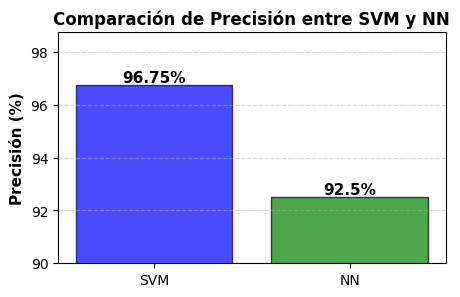

In [ ]:
modelos = ['SVM', 'NN']
precision = [accuracy, accuracy2]

plt.figure(figsize=(5, 3))
barras = plt.bar(modelos, precision, color=['blue', 'green'], alpha=0.7, edgecolor='black')

plt.ylabel('Precisión (%)', fontsize=11, fontweight='bold')
plt.title('Comparación de Precisión entre SVM y NN', fontsize=12, fontweight='bold')
plt.ylim(90, max(precision)+2)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for barra, valor in zip(barras, precision):
    plt.text(barra.get_x() + barra.get_width()/2, valor, f"{valor}%",
             ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')

plt.show()

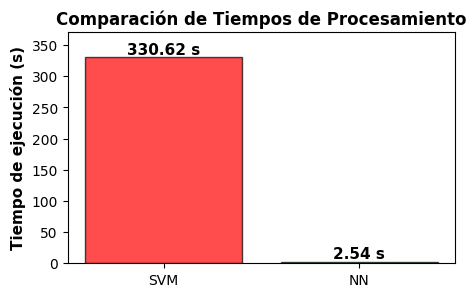

In [ ]:
tiempos = [elapsed_time, elapsed_timeNN]
plt.figure(figsize=(5, 3))
barras = plt.bar(modelos, tiempos, color=['red', 'green'], alpha=0.7, edgecolor='black')

plt.ylabel('Tiempo de ejecución (s)', fontsize=11, fontweight='bold')
plt.title('Comparación de Tiempos de Procesamiento', fontsize=12, fontweight='bold')
plt.ylim(0, max(tiempos) + 40)

for i, barra in enumerate(barras):
    plt.text(barra.get_x() + barra.get_width()/2, barra.get_height(),
             f"{tiempos[i]:.2f} s", ha='center', va='bottom',
             fontsize=11, fontweight='bold', color='black')

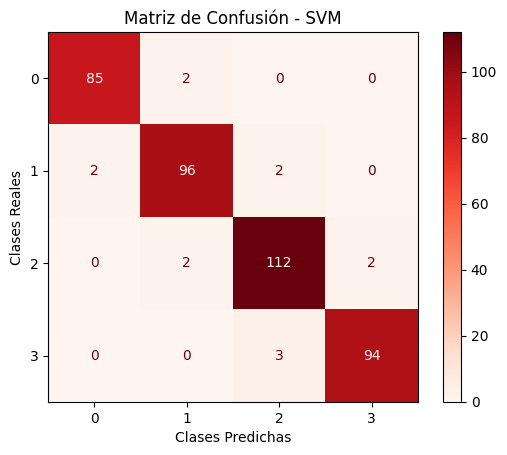

In [ ]:
y_pred_svm = modeloSVM_optimo.predict(X_test)
svm_conf_matrix = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(svm_conf_matrix, display_labels=np.unique(y_test))
disp_svm.plot(cmap='Reds')
plt.title("Matriz de Confusión - SVM")
plt.xlabel("Clases Predichas")
plt.ylabel("Clases Reales")
plt.show()

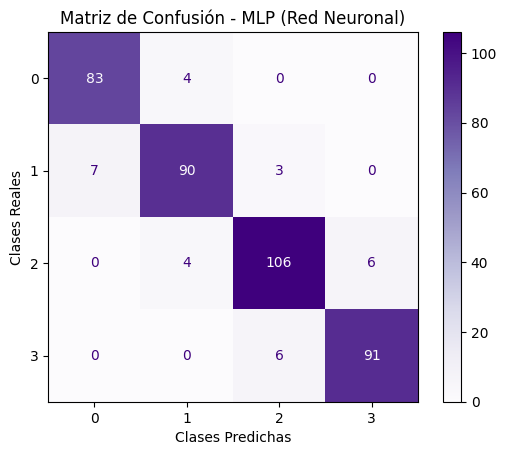

In [ ]:
y_pred_mlp = classifier.predict(X_test)
mlp_conf_matrix = confusion_matrix(y_test, y_pred_mlp)
disp_mlp = ConfusionMatrixDisplay(mlp_conf_matrix, display_labels=np.unique(y_test))
disp_mlp.plot(cmap='Purples')
plt.title("Matriz de Confusión - MLP (Red Neuronal)")
plt.xlabel("Clases Predichas")
plt.ylabel("Clases Reales")
plt.show()

In [ ]:
!apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
!jupyter nbconvert --to pdf "/content/Actividad 2.ipynb"


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-plain-generic is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.
[NbConvertApp] Converting notebook /content/Actividad 2.ipynb to pdf
[NbConvertApp] Support files will be in Actividad 2_files/
[NbConvertApp] Making directory ./Actividad 2_files
[NbConvertApp] Writing 76836 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 468645 bytes to /content/Actividad 2.pdf
